# Demo of *metrics* module
To use the *metrics* module, one may copy the *metrics.py* file into the folder that also contains the `file.py` or `file.ipynb` into which the module shall be imported. Just like this `metircs_demo.ipynb` file is in the same folder as the *metrics* module.

The `metrics.py` file contains two functions:
- `make_confusion_matrix()` calculates and plots or returns a confusion matrix using `sklearn` commands plus custom code.
- `f1_strict_IOB()` uses [seqeval](https://github.com/chakki-works/seqeval)'s $F_1$ score with `strict` mode and the scheme [`IOB2`](http://cs229.stanford.edu/proj2005/KrishnanGanapathy-NamedEntityRecognition.pdf), as appropriate for our case.

## Confusion matrix
The function preprocesses the predictions and labels and turns them into a confusion matrix where actuall classes correspond to rows and predictions to columns. The order of both is determined by the `labels` which are passed as an argument. By default, each actual class (row) is represented by 100%, distributed over the predictions (columns). Use `percentage=False` to obtain raw counts. This as well as other options are shown in the examples below.

[[88.88888889  0.         11.11111111]
 [ 0.         66.66666667 33.33333333]
 [66.66666667  0.         33.33333333]]
[[8 0 1]
 [0 2 1]
 [2 0 1]]


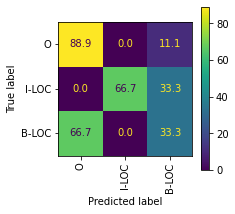

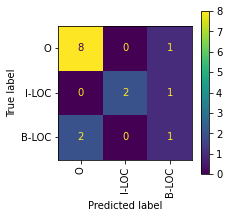

In [1]:
import metrics as mtx
y_true = [["O", "B-LOC", "I-LOC", "I-LOC"], ["O", "O", "O", "O"], ["O", "B-LOC", "I-LOC", "O"], ["O", "B-LOC", "O"]]
y_pred = [["O", "O", "I-LOC", "B-LOC"], ["O", "O", "O", "O"], ["O", "B-LOC", "I-LOC", "O"], ["O", "O", "B-LOC"]]
labels = ["O", "I-LOC", "B-LOC"] # the labels appear in this order in the confusion matrix

# percentage=True (default) + plot=False => return confusion matrix with percentages (100% per actual class)
print(mtx.make_confusion_matrix(y_true, y_pred, labels, size=3, plot=False))
# percentage=False + plot=False => return confusion matrix with raw counts
print(mtx.make_confusion_matrix(y_true, y_pred, labels, size=3, percentage=False, plot=False))
# percentage=True (default) + plot=True (default) => plot confusion matrix with percentages (100% per actuall class)
mtx.make_confusion_matrix(y_true, y_pred, labels, size=3) # specify size=3
# percentage=False + plot=True (default) => plot confusion matrix with raw counts
mtx.make_confusion_matrix(y_true, y_pred, labels, size=3, percentage=False) # specify size=3

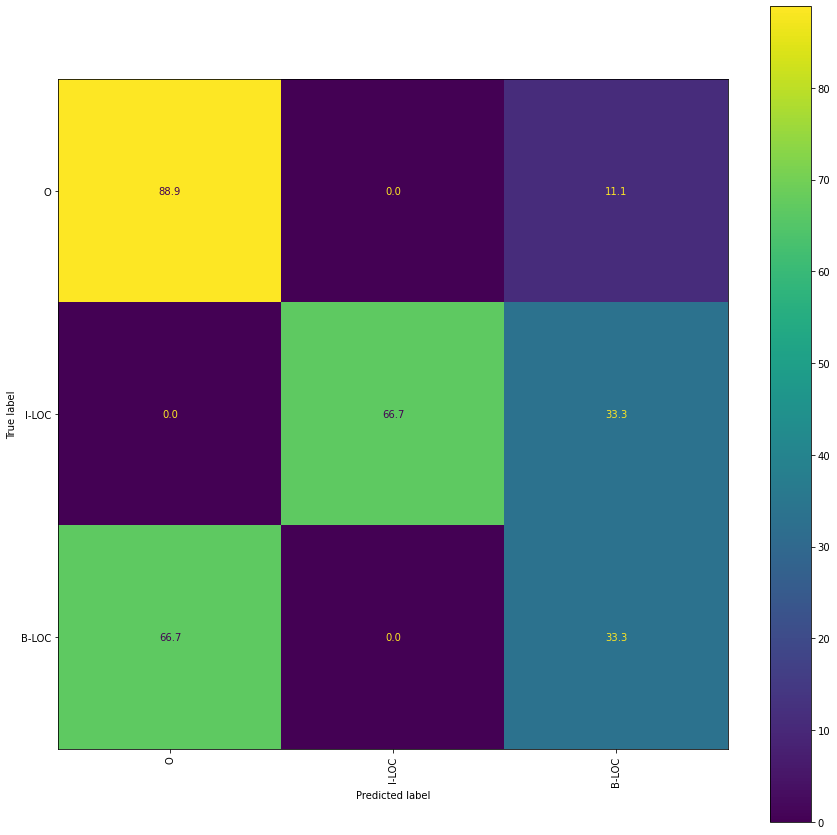

In [2]:
mtx.make_confusion_matrix(y_true, y_pred, labels) # default size

## $F_1$ score
In contrast to vanilla $F_1$ scoring, this score focusses on correct classification of entire entities, i.e., across subword tokens in case the entity contains more than one token.

In [3]:
mtx.f1_strict_IOB2(y_true, y_pred)

0.3333333333333333

> Indeed, only one out of three entities has been classified correctly.
> Specifically, only `["B-LOC", "I-LOC"]` in the third instance, `["O", "B-LOC", "I-LOC", "O"]`, see `y_true` and `y_pred` above.

$\checkmark$